# Individual Notebook
### Salem Alnoamani

## Installing Required Libraries To Load, Understand, Clean and Visualize Data

In [1]:
!pip install pandas
!pip install missingno
!pip install matplotlib
!pip install pandas matplotlib seaborn


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Analyzing And Understanding Datasets

In [3]:
# Analyzing the dataset that is specific to individual
import pandas as pd
country_wise_df = pd.read_csv("country_wise_latest.csv")
print("Country Wise Latest Date Info:")
print(country_wise_df.info())

Country Wise Latest Date Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region 

In [4]:
# printing missing values of country wise df
print(country_wise_df.isnull().sum())

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


In [5]:
# Printing first few rows of country_wise_df
print(country_wise_df.head())

  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

In [6]:
#Describing country_wise_df
print(country_wise_df.describe())

          Confirmed         Deaths     Recovered        Active     New cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4.000000   
50%    5.059000e+03     108.000000  2.815000e+03  1.600000e+03     49.000000   
75%    4.046050e+04     734.000000  2.260600e+04  9.149000e+03    419.500000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  56336.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count   187.000000     187.000000          187.000000             187.000000   
mean     28.957219     933.812834            3.019519              64.820535   
std     120.037173    4197.719635      

C:\Users\SBINM\PycharmProjects\COVID-19\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


# Insight 1: Death and Recovery Rate by WHO Region to be Consice.

In [7]:
who_region_counts = country_wise_df["WHO Region"].value_counts()
# Convert to DataFrame for better readability
who_region_df = who_region_counts.to_frame().reset_index()
who_region_df.columns = ["WHO Region", "Count"]

# Display the DataFrame
print(who_region_df)

              WHO Region  Count
0                 Europe     56
1                 Africa     48
2               Americas     35
3  Eastern Mediterranean     22
4        Western Pacific     16
5        South-East Asia     10


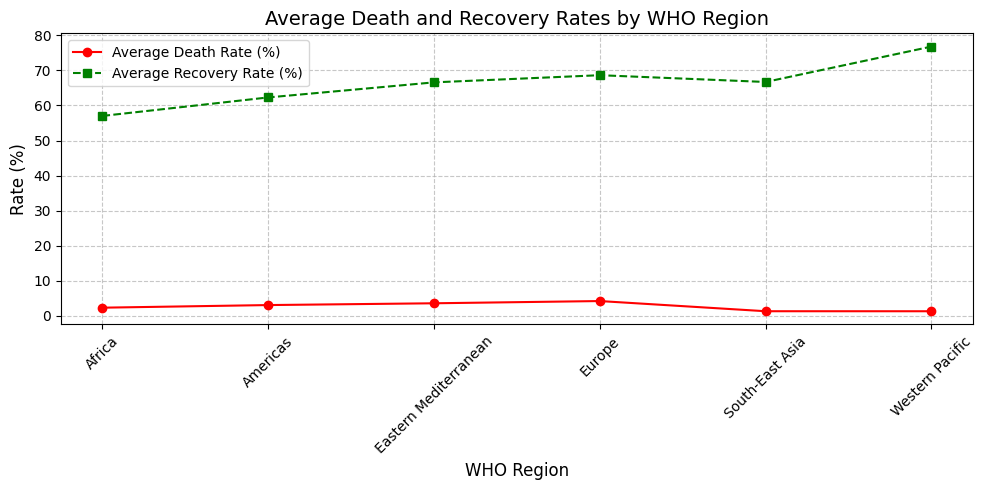

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate Death and Recovery Rates by WHO Region
who_region_rates = country_wise_df.groupby("WHO Region")[["Deaths / 100 Cases", "Recovered / 100 Cases"]].mean().reset_index()

# Rename columns for clarity
who_region_rates.rename(columns={"Deaths / 100 Cases": "Average Death Rate (%)", 
                                 "Recovered / 100 Cases": "Average Recovery Rate (%)"}, inplace=True)

# Plot the line graph
plt.figure(figsize=(10, 5))
plt.plot(who_region_rates["WHO Region"], who_region_rates["Average Death Rate (%)"], 
         marker='o', linestyle='-', color='red', label="Average Death Rate (%)")
plt.plot(who_region_rates["WHO Region"], who_region_rates["Average Recovery Rate (%)"], 
         marker='s', linestyle='--', color='green', label="Average Recovery Rate (%)")

# Formatting the chart
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("WHO Region", fontsize=12)
plt.ylabel("Rate (%)", fontsize=12)
plt.title("Average Death and Recovery Rates by WHO Region", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Addition Insight: Bar Chart to see Death & Recovery Rates by Middle Easter Region Countries

In [9]:
# Import necessary libraries
import pandas as pd

# Load the dataset (Update the path if necessary)
file_path = "country_wise_latest.csv"  # If running locally, update the file path
df = pd.read_csv(file_path)

# Define a list of Middle Eastern countries excluding Israel
middle_eastern_countries = [
    "Afghanistan", "Bahrain", "Iran", "Iraq", "Jordan", "Kuwait", "Lebanon",
    "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "Turkey", "United Arab Emirates", "Yemen"
]

# Filter the dataset for Middle Eastern countries except Israel
middle_east_df = df[df["Country/Region"].isin(middle_eastern_countries)]

# Select only relevant columns for visualization
middle_east_df_filtered = middle_east_df[["Country/Region", "Confirmed", "Recovered / 100 Cases"]]
middle_east_df_filtered.rename(columns={"Recovered / 100 Cases": "Recovered Rate (%)"}, inplace=True)

# Display the filtered table
from IPython.display import display
display(middle_east_df_filtered)

C:\Users\SBINM\AppData\Local\Temp\ipykernel_18780\3811431160.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_east_df_filtered.rename(columns={"Recovered / 100 Cases": "Recovered Rate (%)"}, inplace=True)


,Country/Region,Confirmed,Recovered Rate (%)
0,Afghanistan,36263,69.49
12,Bahrain,39482,91.46
81,Iran,293606,86.90
82,Iraq,112585,68.52
88,Jordan,1176,88.52
92,Kuwait,64379,85.52
96,Lebanon,3882,44.02
127,Oman,77058,74.01
136,Qatar,109597,97.02
145,Saudi Arabia,268934,82.90
